In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

df = pd.read_csv('./data/Tourism.CSV')



CustomerID: 고객 ID

ProdTaken: 상품구매여부 (0:No,1:Yes)

Age: 나이

TypeofContact: 고객의 제품 인지 방법

CityTier: 주거 중인 도시의 등급 (1등급, 2등급, 3등급)

DurationOfPitch: 영업 사원이 고객에게 제공한 기간 

Occupation: 직업

Gender: 성별

NumberOfPersonVisiting: 고객과 함께 여행 계획 중인 인원

NumberOfFollowups: 영업사원의 프레젠테이션 후 이루어진 수

ProductPitched: 영업사원이 제시한 상품

PreferredPropertyStar: 선호 숙박 업소 등급

MaritalStatus: 결혼여부

NumberOfTrips: 평균 연간 여행 횟수

Passport: 여권 보유 여부 (0:No,1:Yes)

PitchSatisfactionScore: 영업만족도

OwnCar: 차량소유여부 (0:No,1:Yes)

NumberOfChildrenVisiting: 함께 여행을 고려 중인 5세 미만의 어린이 수

Designation: 직급

MonthlyIncome: 월 급여

## EDA

In [4]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [7]:
import pandas as pd
import sweetviz as sv

# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')

df = pd.read_csv('./data/Tourism.CSV')
sv.config_parser.read_string("[General]\nuse_cjk_font=1")
my_report = sv.analyze(df)
# my_report.show_notebook(layout='widescreen',scale=0.8) #notebook, colab에서 표시하기
my_report.show_html('./image/sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report ./image/sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


```
* 결측치 : 많음
* 중복값 : 없음
* 이상치 : 없음
* 형변환 : object 인 행들..
* 상관관계: 양
* 인코딩 :  object 인 행들..
* 스케일링: 인슐린이상치 많음으로 스탠다드나 로버스트 사용
* 라벨불균형여부: 1이적음 불균형 -> f1 스코어,재현율 recall
```


In [17]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

<Axes: >

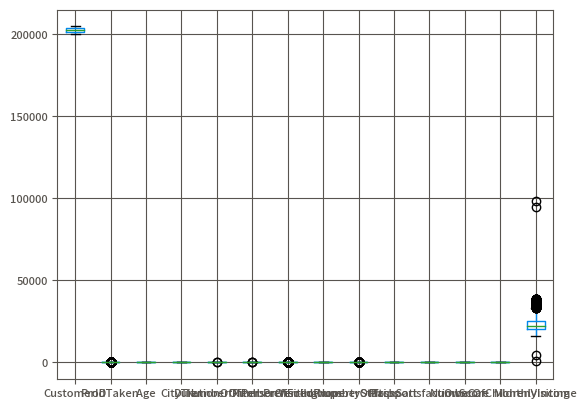

In [18]:
df.boxplot()